Summary : using a surrogate to show how the homeostasis recovers from a deviation to equiprobability. Little nb_quant, slower decrease of coeffs. Homeostasis should work better.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.set_printoptions(precision=6, suppress=True, threshold=np.inf)
%load_ext autoreload
%autoreload 2

### 1. Learning a good dictionnary

In [2]:
matname = '2017-05-30_surrogate_DEBUG'
DEBUG_DOWNSCALE, verbose = 10, 10
matname = '2017-05-30_surrogate'
DEBUG_DOWNSCALE, verbose = 1, 10

do_sym = False
C = 5
n_dictionary = 18**2
nb_quant = 128


N_image = 10000//DEBUG_DOWNSCALE
database = '../../2017-02-07_UnsupervisedLearning/database'
l0_sparseness = 10
N_boost=n_dictionary//2 
K_boost = 4.
rho_coeff = .9
do_plots = False
i_sample = 13


eta_homeo = .001*DEBUG_DOWNSCALE
n_step = 1000//DEBUG_DOWNSCALE

loading the data called : /tmp/data_cache/2017-05-30_surrogate_data
loading the data called : /tmp/data_cache/2017-05-30_surrogate_data
loading the dico called : 2017-05-30_surrogate


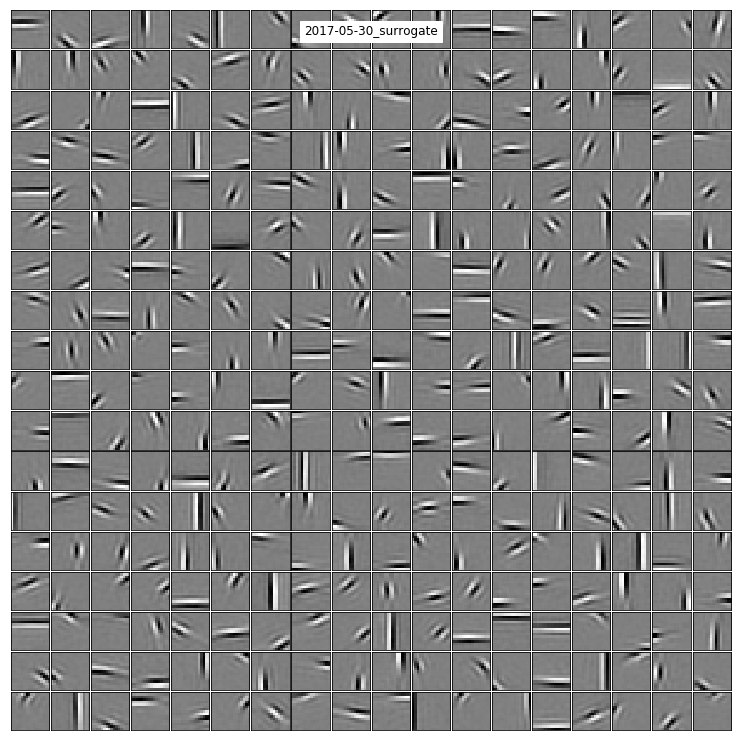

In [3]:
from shl_scripts.shl_experiments import SHL
list_figures  = ['show_dico']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
shl = SHL(n_dictionary=n_dictionary, database=database, DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose, C=C, do_sym=do_sym, nb_quant=nb_quant)
data = shl.get_data(matname=matname)
dico = shl.learn_dico(matname=matname, list_figures=list_figures)

### 1.0 Analysis of present coding

### 2. Generate an image from the dictionary

#### 2.1. Generate a random sparse vector

In [4]:
from shl_scripts.shl_tools import generate_sparse_vector
sparse_vector, rho_vector = generate_sparse_vector(N_image, l0_sparseness, dico.n_dictionary, N_boost=N_boost, K_boost=K_boost, rho_coeff=rho_coeff)
print ('Sparse vector = \n', sparse_vector[i_sample, : ], ' and the respetive rho of each coeff \n', rho_vector[i_sample, : ])
print('List of non-zero coeffficients given by their addresses', np.nonzero(sparse_vector[i_sample, : ]))

Sparse vector = 
 [  0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
  12.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         8.748     

In [5]:
print ('Rho of each non-zero coeffficients given by their addresses', rho_vector[i_sample, np.nonzero(sparse_vector[i_sample, : ]) ] )

Rho of each non-zero coeffficients given by their addresses [[ 1.        0.990741  0.993827  0.978395  0.987654  0.996914  0.984568
   0.975309  0.972222  0.981481]]


#### 2.2. Generate an Image as a linear combination of the sparse vector and the dictionary

In [6]:
def generate_images(dico, vector):
    image = dico.dictionary.T @ vector.T
    return image.T

image = generate_images(dico, sparse_vector)
print(image.shape)

(10000, 256)


#### 2.3. Plot the image

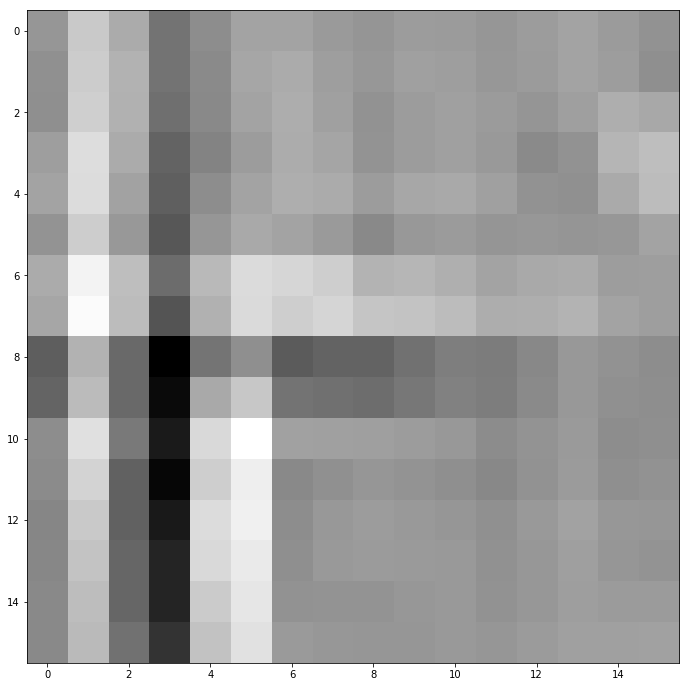

In [7]:
n_pixels = dico.dictionary.shape[1]
n_pixels_sqrt = int(np.sqrt(n_pixels))
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(image[i_sample, :].reshape(n_pixels_sqrt, n_pixels_sqrt), cmap='gray', interpolation="nearest")
plt.show()

### 3. Matching Pursuit Coding of the synthetic image

In [8]:
from shl_scripts.shl_encode import mp 
mp_sparse_code = mp(image, dico.dictionary, l0_sparseness, verbose=True, C=C, do_sym=do_sym)
mp_sparse_code.shape

coding duration : 1.1343021392822266


(10000, 324)

In [9]:
print('Sparse vector = ', mp_sparse_code[i_sample, : ])
print('List of non-zero coeffficients given by their addresses', np.nonzero(sparse_vector[i_sample, : ]))
print('List of non-zero coeffficients given by their addresses', np.nonzero(mp_sparse_code[i_sample, :]))

Sparse vector =  [  0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
  14.540862   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         2.475162   0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         8.508313   

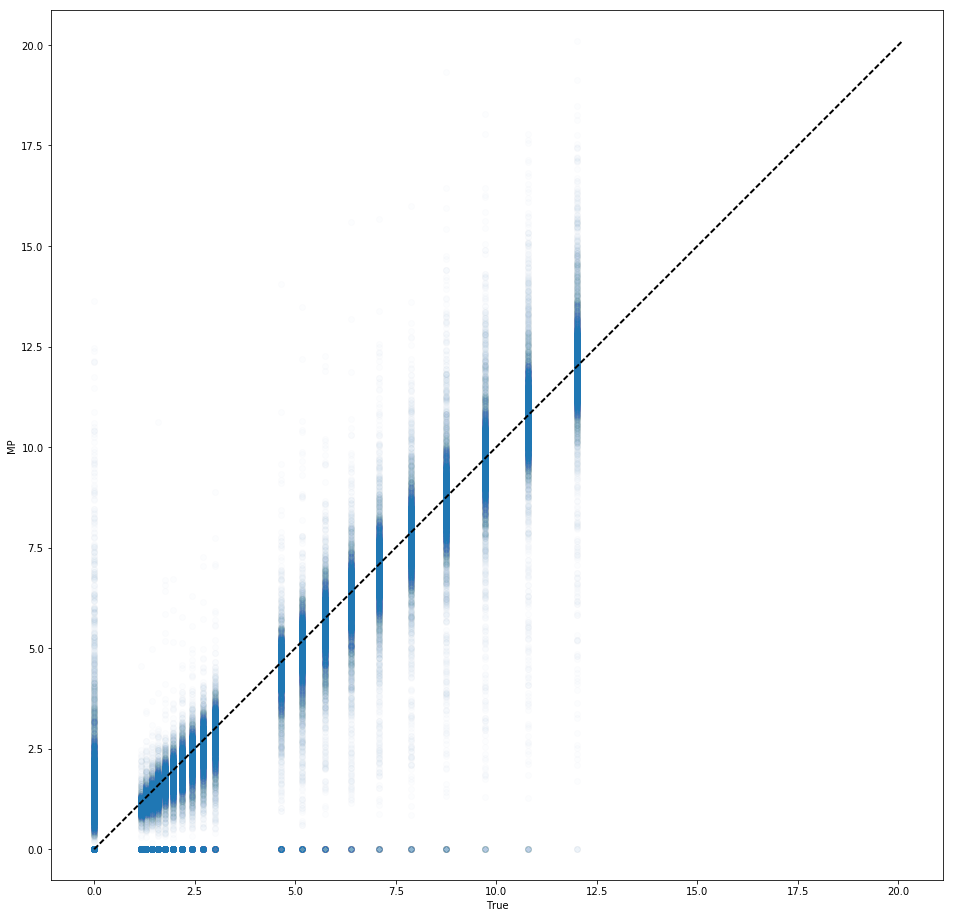

In [10]:
from shl_scripts.shl_tools import plot_scatter_MpVsTrue

plot_scatter_MpVsTrue(sparse_vector, mp_sparse_code);

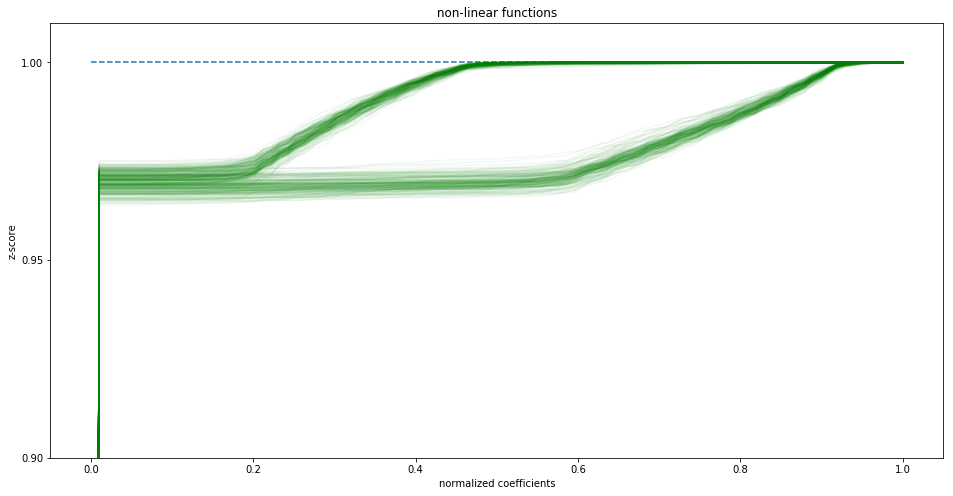

In [11]:
from shl_scripts.shl_learn import get_P_cum
from shl_scripts.shl_tools import plot_P_cum
fig, ax = plot_P_cum(get_P_cum(mp_sparse_code, C=C, do_sym=do_sym))
ax.set_ylim(0.9, 1.01);

coding duration : 0.9923832416534424


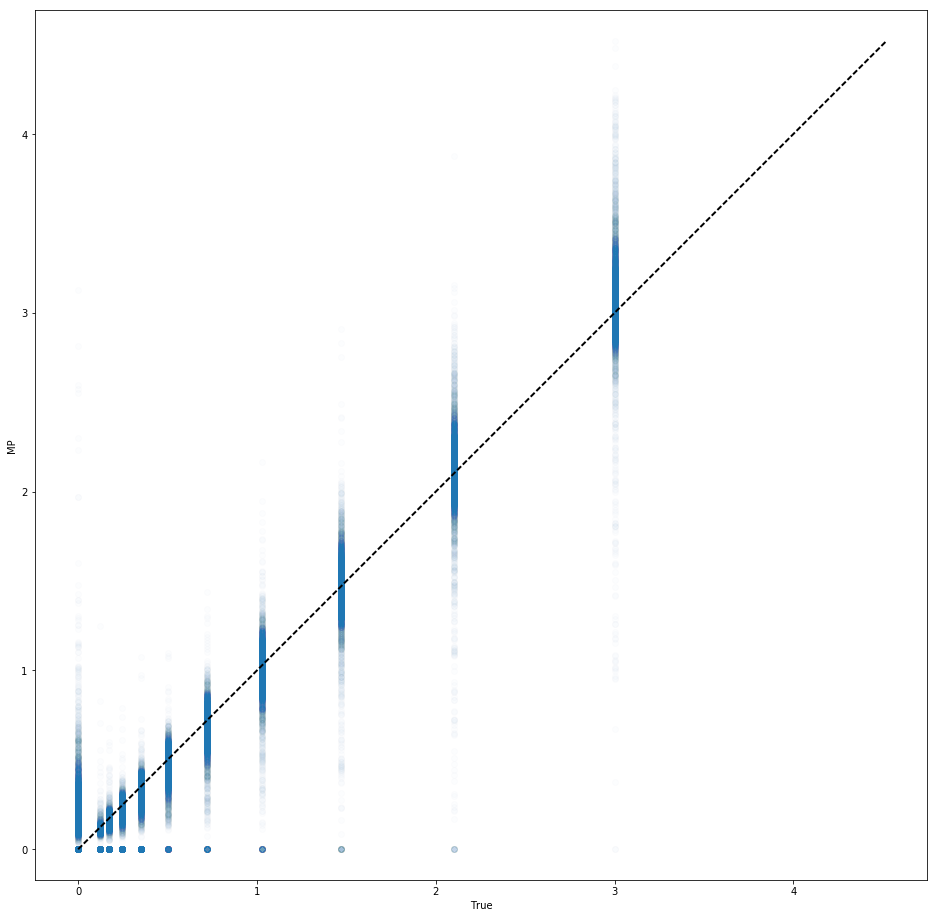

In [12]:
sparse_vector_, rho_vector_ = generate_sparse_vector(N_image, l0_sparseness, dico.n_dictionary, rho_coeff=.7, N_boost=0, K_boost=1., seed=420, do_sym=do_sym)
image_ = generate_images(dico, sparse_vector_)
mp_sparse_code_ = mp(image_, dico.dictionary, l0_sparseness, verbose=True, C=C, do_sym=do_sym)
plot_scatter_MpVsTrue(sparse_vector_, mp_sparse_code_);

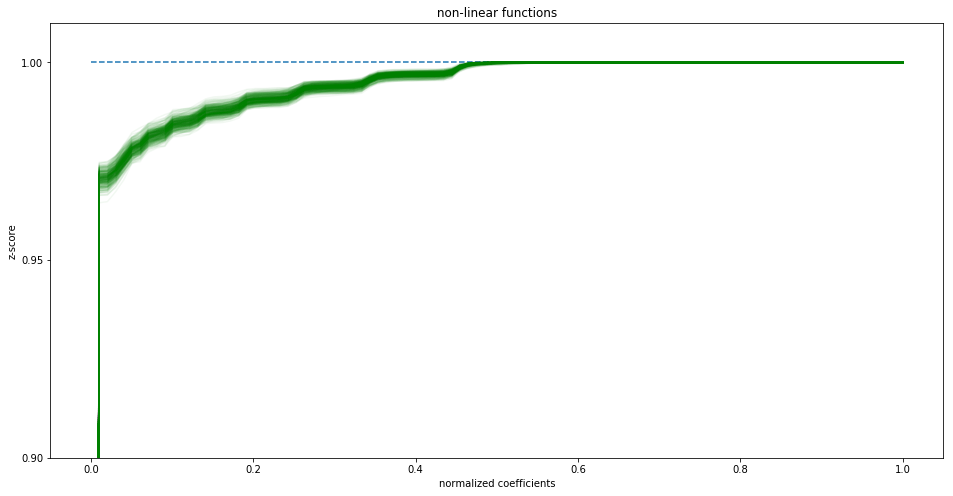

In [13]:
fig, ax = plot_P_cum(get_P_cum(mp_sparse_code_, C=C, do_sym=do_sym))
ax.set_ylim(0.9, 1.01);

In [14]:
print ('Ranks of each non-zero coeffficients given by their addresses', rho_vector[i_sample, np.nonzero(sparse_vector[i_sample, : ]) ] )
print ('Ranks of each non-zero coeffficients given by their addresses', rho_vector[i_sample, np.nonzero(mp_sparse_code[i_sample, : ]) ] )
from scipy.stats import spearmanr
print ('Spearman coeficient ', spearmanr(sparse_vector[:2, : ], mp_sparse_code[:2, : ], axis=1) )
spearR = [spearmanr(sparse_vector[i_test, : ], mp_sparse_code[i_test, : ])[0] for i_test in range(N_image) ]
print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )

Ranks of each non-zero coeffficients given by their addresses [[ 1.        0.990741  0.993827  0.978395  0.987654  0.996914  0.984568
   0.975309  0.972222  0.981481]]
Ranks of each non-zero coeffficients given by their addresses [[ 1.        0.        0.990741  0.993827  0.987654  0.996914  0.984568
   0.975309  0.972222  0.981481]]
Spearman coeficient  SpearmanrResult(correlation=array([[ 1.      , -0.031837,  1.      , -0.031837],
       [-0.031837,  1.      , -0.031837,  0.999996],
       [ 1.      , -0.031837,  1.      , -0.031837],
       [-0.031837,  0.999996, -0.031837,  1.      ]]), pvalue=array([[ 0.      ,  0.568005,  0.      ,  0.568005],
       [ 0.568005,  0.      ,  0.568005,  0.      ],
       [ 0.      ,  0.568005,  0.      ,  0.568005],
       [ 0.568005,  0.      ,  0.568005,  0.      ]]))
Spearman coeficient  0.9521449853 +/- 0.0770521211777


In [15]:
spearR = [spearmanr(rho_vector[i_test, : ], mp_sparse_code[i_test, : ])[0] for i_test in range(N_image) ]
print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )

Spearman coeficient  0.951578957196 +/- 0.0774970424549


In [16]:
spearR = [spearmanr(rho_vector[i_test, np.nonzero(sparse_vector[i_test, : ])], 
                    mp_sparse_code[i_test, np.nonzero(sparse_vector[i_test, : ]) ])[0] for i_test in range(N_image) ]
print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )

Spearman coeficient  nan +/- nan


In [17]:
from shl_scripts.shl_tools import plot_proba_histogram
from shl_scripts.shl_encode import z_score, prior
C = 5
n_samples, nb_filter = mp_sparse_code.shape
P_cum = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((nb_filter, 1))
stick = np.arange(dico.n_dictionary)*nb_quant

In [18]:
rho_sparse_code = z_score(P_cum, prior(mp_sparse_code, C=C), stick)
print('Sparse vector = ', mp_sparse_code[i_sample, : ])
print('rho_true vector = ', rho_vector[i_sample, : ])
print('rho_hat  vector = ', rho_sparse_code[i_sample, : ])
spearR = [spearmanr(rho_vector[i_test, : ], rho_sparse_code[i_test, : ])[0] for i_test in range(N_image) ]
print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )

Sparse vector =  [  0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
  14.540862   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         2.475162   0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         8.508313   

Spearman coeficient  0.951580148614 +/- 0.0774953634051


In [19]:
help(spearmanr)

Help on function spearmanr in module scipy.stats.stats:

spearmanr(a, b=None, axis=0, nan_policy='propagate')
    Calculates a Spearman rank-order correlation coefficient and the p-value
    to test for non-correlation.
    
    The Spearman correlation is a nonparametric measure of the monotonicity
    of the relationship between two datasets. Unlike the Pearson correlation,
    the Spearman correlation does not assume that both datasets are normally
    distributed. Like other correlation coefficients, this one varies
    between -1 and +1 with 0 implying no correlation. Correlations of -1 or
    +1 imply an exact monotonic relationship. Positive correlations imply that
    as x increases, so does y. Negative correlations imply that as x
    increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Spearman correlation at least as extreme
    as the one computed from these datasets. The p-values are not

In [20]:
rho_sparse_code[rho_sparse_code==0] = np.nan
spearR = [spearmanr(rho_vector[i_test, : ], rho_sparse_code[i_test, : ], nan_policy='omit')[0] for i_test in range(N_image) ]
print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )

Spearman coeficient  0.458923008658 +/- 0.298200103895


mean Errors per image =  0.3566
Spearman coeficient  0.951578957196 +/- 0.0774970424549
Spearman coeficient  0.458923008658 +/- 0.298200103895


(0.45892300865800872, 0.29820010389466162)

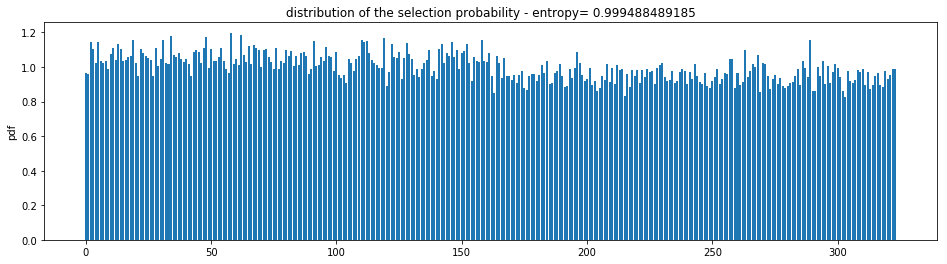

In [ ]:
def evaluate(P_cum, my_sparse_code):
    print('mean Errors per image = ', np.sum(1 - ((np.abs(my_sparse_code)>0)*1) == sparse_vector) / N_image )
    fig, ax = plot_proba_histogram(my_sparse_code)
    rho_sparse_code = z_score(P_cum, prior(my_sparse_code, C=C), stick)
    spearR = [spearmanr(rho_vector[i_test, : ], my_sparse_code[i_test, : ])[0] for i_test in range(N_image) ]
    print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )
    rho_sparse_code[rho_sparse_code==0] = np.nan
    spearR = [spearmanr(rho_vector[i_test, : ], rho_sparse_code[i_test, : ], nan_policy='omit')[0] for i_test in range(N_image) ]
    print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )
    return np.mean(spearR), np.std(spearR)
    
evaluate(P_cum, mp_sparse_code)    

### 4. Pcum Coding of the synthetic image

In [ ]:
from shl_scripts.shl_learn import update_P_cum

result = []
for i in range(n_step):
    Pcum_sparse_code = mp(image, dico.dictionary, l0_sparseness, P_cum=P_cum, C=C, do_sym=do_sym)
    P_cum = update_P_cum(P_cum, code=Pcum_sparse_code, eta_homeo=eta_homeo, nb_quant=nb_quant, C=C, do_sym=do_sym, verbose=False)
    if i % (n_step//20) == 0:
        print('Learning step', i)
        result.append([i, evaluate(P_cum, Pcum_sparse_code)])


Learning step 0
mean Errors per image =  0.3633
Spearman coeficient  0.950597323554 +/- 0.0777023237707
Spearman coeficient  0.458799269481 +/- 0.298930135582
Learning step 50
mean Errors per image =  0.3558
Spearman coeficient  0.952037990933 +/- 0.0776356980018
Spearman coeficient  0.458571612554 +/- 0.297388550683
Learning step 100
mean Errors per image =  0.3558
Spearman coeficient  0.952037990933 +/- 0.0776356980018
Spearman coeficient  0.458571612554 +/- 0.297388550683
Learning step 150
mean Errors per image =  0.3558
Spearman coeficient  0.952037990933 +/- 0.0776356980018
Spearman coeficient  0.458571612554 +/- 0.297388550683
Learning step 200
mean Errors per image =  0.3558
Spearman coeficient  0.952037990933 +/- 0.0776356980018
Spearman coeficient  0.458571612554 +/- 0.297388550683
Learning step 250
mean Errors per image =  0.357
Spearman coeficient  0.951939494505 +/- 0.0777589307079
Spearman coeficient  0.458843560606 +/- 0.297222943253


In [ ]:
#P_cum = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((nb_filter, 1))
fig, ax = plot_P_cum(P_cum, verbose=False);
ax.set_ylim(0.9, 1.01);

### conclusion: plots

In [ ]:
if do_plots:
    figsize = (8, 3)
    from shl_scripts.shl_tools import plot_P_cum
    #P_cum = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((nb_filter, 1))
    fig, ax = plot_P_cum(P_cum, verbose=False);
    fig.set_size_inches(figsize)
    plt.tight_layout()
    ax.set_ylim(0.85, 1.01);
    fig.savefig('z_score.pdf')


    fig, ax = plot_proba_histogram(mp_sparse_code)
    fig.set_size_inches(figsize)
    plt.tight_layout()
    ax.set_xlim(0, shl.n_dictionary)
    fig.savefig('PDF_nohomeo.pdf')

    fig, ax = plot_proba_histogram(Pcum_sparse_code)
    fig.set_size_inches(figsize)
    plt.tight_layout()
    ax.set_xlim(0, shl.n_dictionary)
    fig.savefig('PDF_homeo.pdf')
